<a href="https://colab.research.google.com/github/DSYMaO/STA365/blob/main/STA365_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import pymc as pm;
import pandas as pd; import io


In [6]:
from google.colab import files

uploaded = files.upload()


Saving Maths.csv to Maths (3).csv


From Kaggle: https://www.kaggle.com/datasets/whenamancodes/student-performance/data

In [7]:
df = pd.read_csv(io.BytesIO(uploaded['Maths (3).csv']))
print(df)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   
395     GP   F   18       U     GT3       A     4     4   at_home   teacher   
396     MS   M   19       R     GT3       T     1     1     other  services   

     ... famrel freetime  goout  Dalc  Walc health 

1)

In [33]:
theta_0,tau = 0,1; alpha,beta = 2,1/2
x=df['G1']

normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model:
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=x)

In [34]:
x.mean()

10.8816120906801

In [26]:
with normal_gamma_toy_model:
    idata_HMC = pm.sample()

:

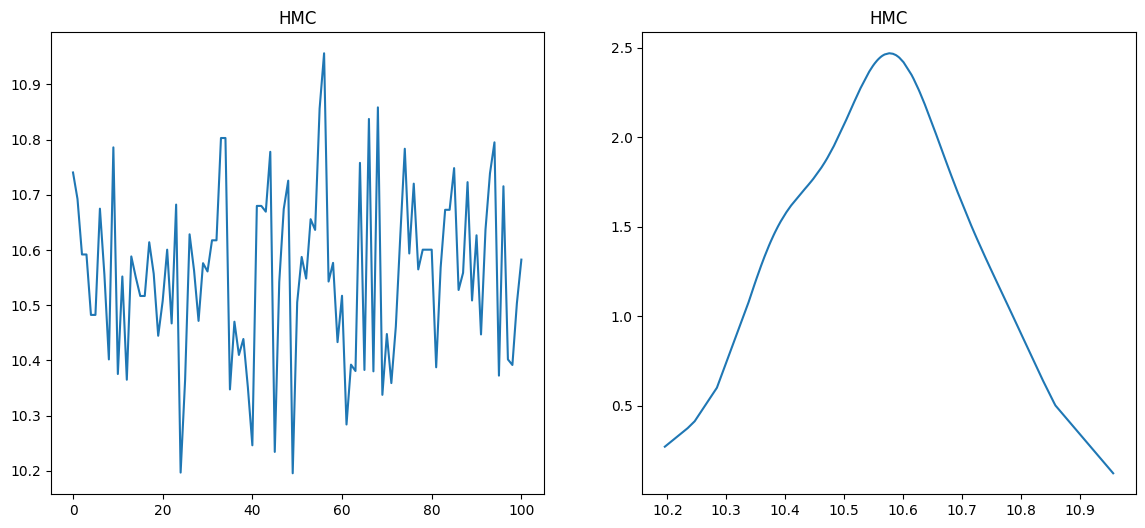

In [27]:
from scipy.stats import gaussian_kde; fig,ax = plt.subplots(1,2, figsize=(14,6))
n_mcmc_samples = 100
mcmc_chain = idata_HMC.posterior["theta"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values; mcmc_chain_sorted = sorted(mcmc_chain)
ax[0].plot(mcmc_chain); ax[1].plot(mcmc_chain_sorted,gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted)); ax[0].set_title("HMC"); ax[1].set_title("HMC");

MCMC chains look normal however its center is a bit further off from the true mean of 10.88

2)

In [45]:
x=df['absences']
negative_binomial = pm.Model()

with negative_binomial:
  mu = pm.Gamma("mu", alpha=1, beta=1)
  x_obs = pm.NegativeBinomial('likelihood', mu = mu, alpha = 0.8, observed=x)

In [46]:
with negative_binomial:
    idata_HMC = pm.sample()

(array([289.,  72.,  25.,   5.,   1.,   2.,   0.,   2.,   0.,   1.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

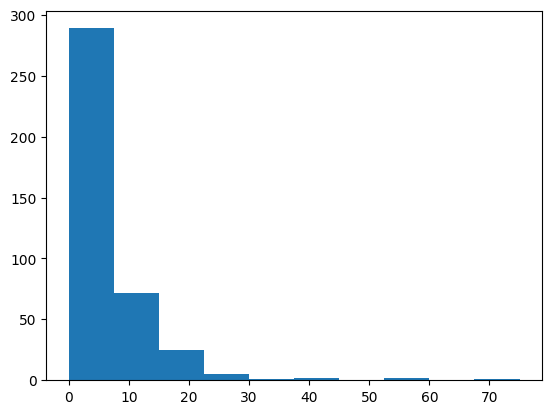

In [30]:
plt.hist(x)

In [49]:
x.mean()

5.69521410579345

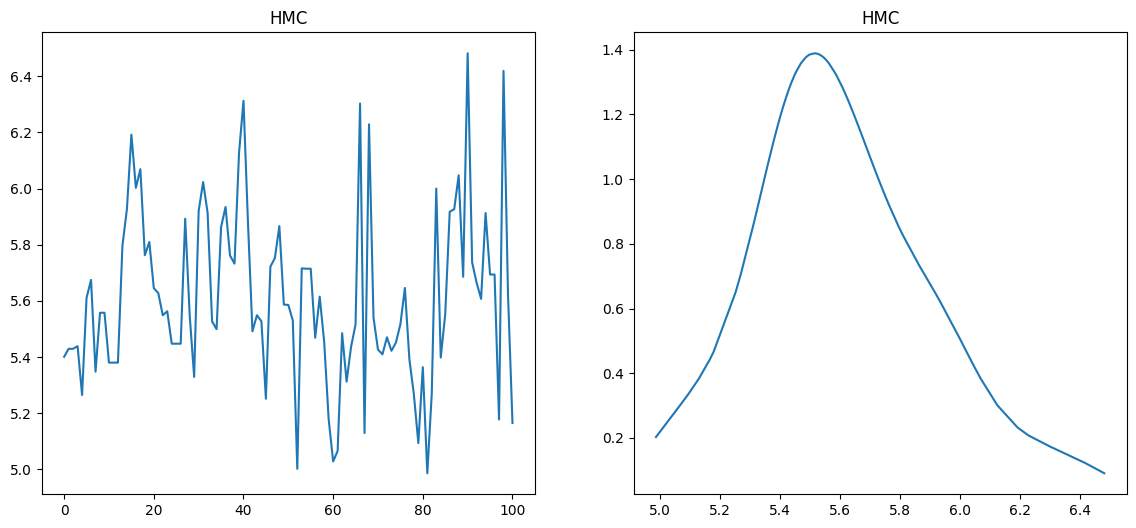

In [48]:
fig,ax = plt.subplots(1,2, figsize=(14,6))
n_mcmc_samples = 100
mcmc_chain = idata_HMC.posterior["mu"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values; mcmc_chain_sorted = sorted(mcmc_chain)
ax[0].plot(mcmc_chain); ax[1].plot(mcmc_chain_sorted,gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted)); ax[0].set_title("HMC"); ax[1].set_title("HMC");

With the Negative binomial model, the resulting mean is close to the true mean of 5.69. We can see that the MCMC chains are also smaller in discrepancy compared to the MCMC chain from earlier

